AND

In [ ]:
!pip install numpy
!pip install matplotlib

In [90]:
import random
from math import exp, log
import numpy as np
import matplotlib.pyplot as plt

In [91]:
X = np.array([[0,0], [0,1], [1,0], [1,1]])
Y_dict = {
    "AND": np.array([0,0,0,1]),
    "OR":  np.array([0,1,1,1]),
    "XOR": np.array([0,1,1,0])
}



In [93]:
class logistic_regression_model():
    def __init__(self):

        self.weights = [random.uniform(-1, 1) for _ in range(2)]
        self.bias = random.uniform(-1, 1)

    def sigmoid(self, z):
        return 1 / (1 + exp(-z))

    def predict(self, x):
        z = sum(w * xi for w, xi in zip(self.weights, x)) + self.bias
        a = self.sigmoid(z)
        return a #predict "y' = a"



In [94]:
def train(X,Y,model,lr):
    dw0 = 0.0
    dw1 = 0.0   
    db = 0.0
    m = len(X)
    cost =  0.0
    for x,y in zip(X,Y):
        a = model.predict(x)
        if y == 1:
            cost += -log(a)
        else:
            cost += -log(1-a)
        dw0 += (a - y) * x[0]
        dw1 += (a - y) * x[1]
        db += (a - y)
    cost /= m
    model.weights[0] -= lr * dw0 / m
    model.weights[1] -= lr * dw1 / m
    model.bias -= lr * db / m
    return cost

In [106]:
learning_rates = [0.01, 0.1, 0.5]
num_epochs = 10000

loss_history = {lr: [] for lr in learning_rates}

for lr in learning_rates:
    model = logistic_regression_model()  
    for epoch in range(num_epochs):
        cost = train(X, Y_dict["XOR"], model, lr)
        loss_history[lr].append(cost)


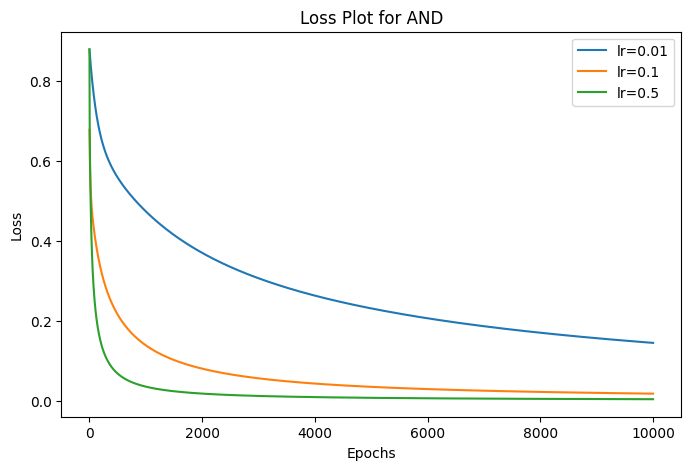

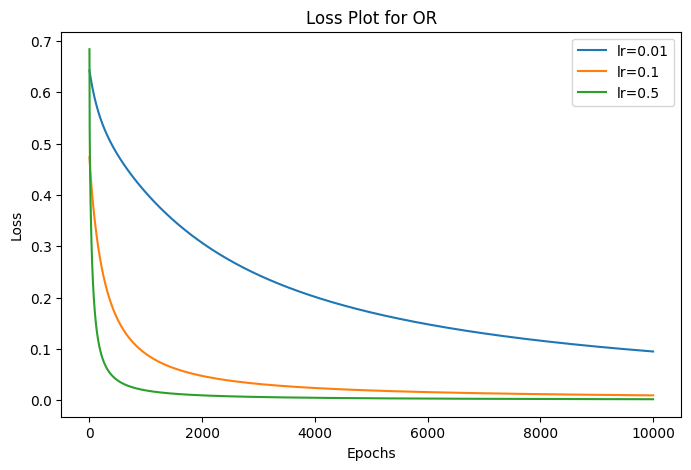

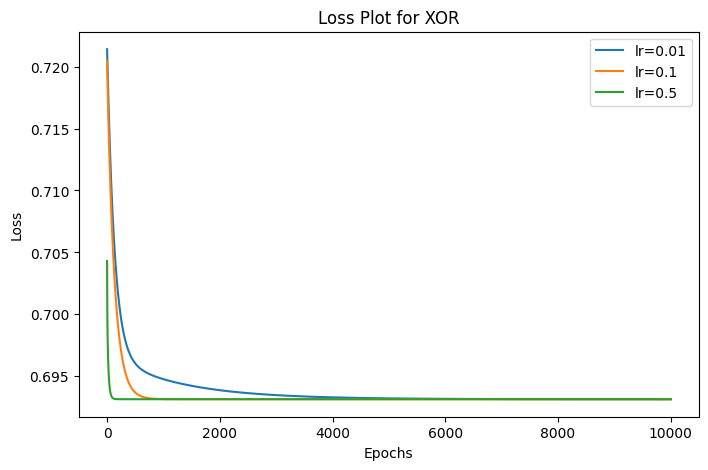

In [111]:
for op in ["AND", "OR", "XOR"]:
    plt.figure(figsize=(8,5))
    for lr in learning_rates:
        model = logistic_regression_model()
        loss_history = []
        for epoch in range(num_epochs):
            cost = train(X, Y_dict[op], model, lr)
            loss_history.append(cost)
        plt.plot(loss_history, label=f'lr={lr}')
    plt.title(f'Loss Plot for {op}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [107]:
model.predict((0,0)) 


0.5

In [108]:
model.predict((0,1)) 

0.5

In [109]:
model.predict((1,0)) 

0.5

In [110]:
model.predict((1,1)) 

0.5